In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Plastic
us_exports_3915_all = pd.read_csv('Standard Report - Exports - Plastic - All.csv', skiprows=2)
us_exports_3915_all['Quantity 1'] = pd.to_numeric(us_exports_3915_all['Quantity 1'].str.replace(',', ''), errors='coerce')
aggregated_df_all = us_exports_3915_all.groupby(['Country', 'Time'])['Quantity 1'].sum().reset_index(name='Total_Quantity')

In [6]:
# Calculate totals for China and Hong Kong by year
china_hk_df = aggregated_df_all[aggregated_df_all['Country'].isin(['China', 'Hong Kong'])]
china_hk_totals_by_year = china_hk_df.groupby('Time')['Total_Quantity'].sum().reset_index()

# Extract World Totals by year
world_totals_df = aggregated_df_all[aggregated_df_all['Country'] == 'World Total']

# Merge to align the years
merged_df = pd.merge(world_totals_df, china_hk_totals_by_year, on='Time', how='left', suffixes=('_World', '_China_HK'))

# Calculate World Total minus China and Hong Kong by year
merged_df['World_Excluding_China_HK'] = merged_df['Total_Quantity_World'] - merged_df['Total_Quantity_China_HK']
merged_df = merged_df[['Time', 'Total_Quantity_China_HK', 'World_Excluding_China_HK']]
merged_df.columns = ['Time', 'China_HK_Total', 'World_Excluding_China_HK_Total']

In [4]:
#Scrap Metal

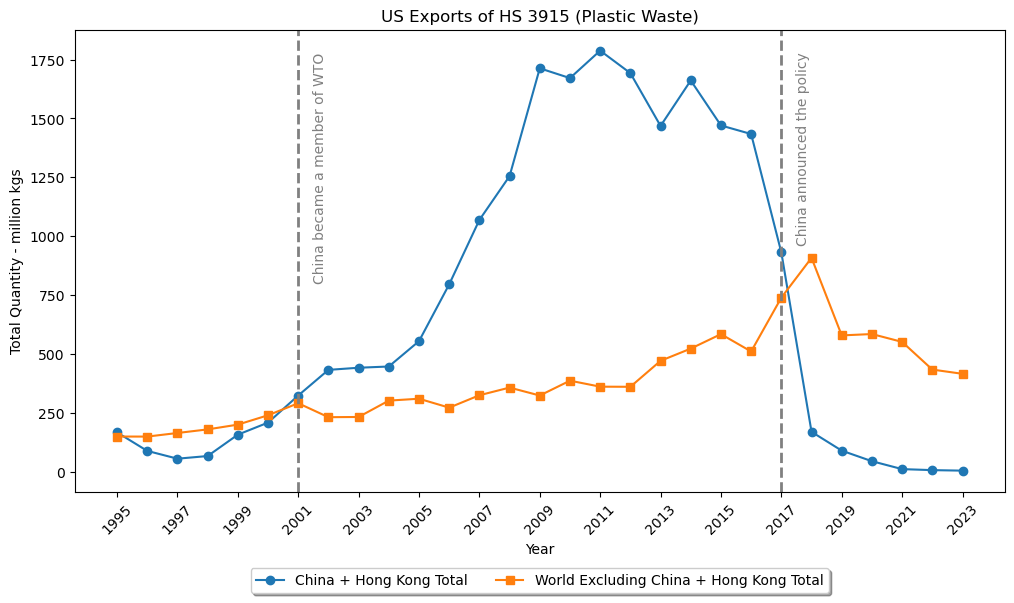

In [28]:
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(merged_df['Time'], merged_df['China_HK_Total']/1e6, label='China + Hong Kong Total', marker='o')
plt.plot(merged_df['Time'], merged_df['World_Excluding_China_HK_Total']/1e6, label='World Excluding China + Hong Kong Total', marker='s')

# Add vertical line for the year 2001
plt.axvline(x=2001, color='grey', linestyle='--', linewidth=2)
plt.text(2001.5, plt.ylim()[1]*0.95, 'China became a member of WTO', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)

# Add vertical line for the year 2017
plt.axvline(x=2017, color='grey', linestyle='--', linewidth=2)
plt.text(2017.5, plt.ylim()[1]*0.95, 'China announced the policy', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)

# Adding plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Quantity - million kgs')
plt.title('US Exports of HS 3915 (Plastic Waste)')

# Place the legend in the middle below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.grid(False)

# Customizing x-ticks to prevent overlapping
plt.xticks(merged_df['Time'][::2])  # Show every second year to avoid clutter
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

plt.savefig('export_hs3915_comparison_plot_ChinaHK_1995.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [20]:
#Scrap Metal
us_exports_7204_all = pd.read_csv('Standard Report - Exports - ScrapMetal - All.csv', skiprows=2)
us_exports_7204_all['Quantity 1'] = pd.to_numeric(us_exports_7204_all['Quantity 1'].str.replace(',', ''), errors='coerce')
metal_df_all = us_exports_7204_all.groupby(['Country', 'Time'])['Quantity 1'].sum().reset_index(name='Total_Quantity')

In [21]:
# Calculate totals for China and Hong Kong by year
china_hk_metal = metal_df_all[metal_df_all['Country'].isin(['China', 'Hong Kong'])]
china_hk_metal_totals_by_year = china_hk_metal.groupby('Time')['Total_Quantity'].sum().reset_index()

# Extract World Totals by year
world_totals_metal = metal_df_all[metal_df_all['Country'] == 'World Total']

# Merge to align the years
merged_metal_df = pd.merge(world_totals_metal, china_hk_metal_totals_by_year, on='Time', how='left', suffixes=('_World', '_China_HK'))

# Calculate World Total minus China and Hong Kong by year
merged_metal_df['World_Excluding_China_HK'] = merged_metal_df['Total_Quantity_World'] - merged_metal_df['Total_Quantity_China_HK']
merged_metal_df = merged_metal_df[['Time', 'Total_Quantity_China_HK', 'World_Excluding_China_HK']]
merged_metal_df.columns = ['Time', 'China_HK_Total', 'World_Excluding_China_HK_Total']

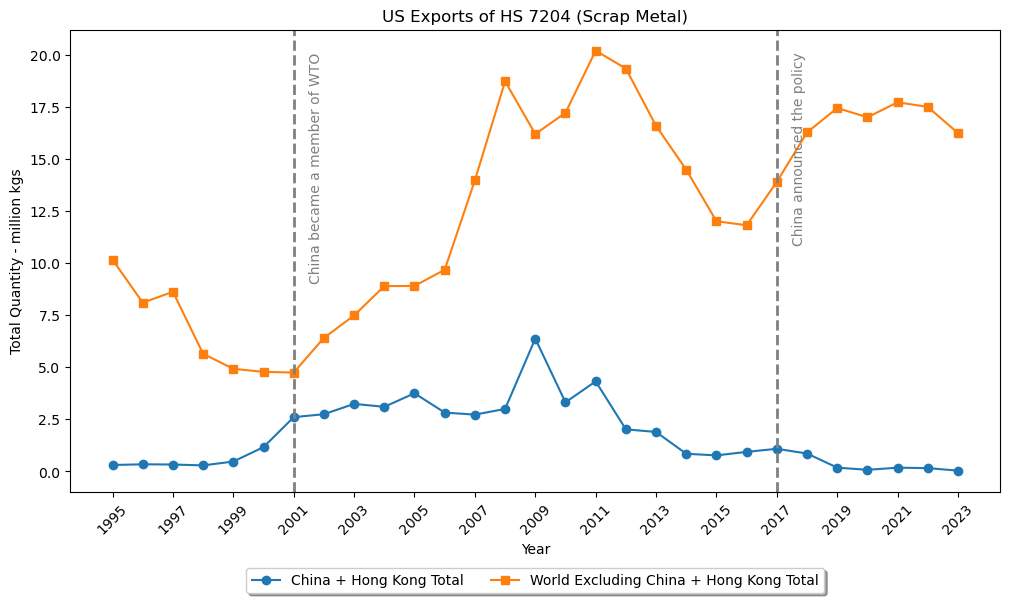

In [27]:
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(merged_metal_df['Time'], merged_metal_df['China_HK_Total']/1e6, label='China + Hong Kong Total', marker='o')
plt.plot(merged_metal_df['Time'], merged_metal_df['World_Excluding_China_HK_Total']/1e6, label='World Excluding China + Hong Kong Total', marker='s')

# Add vertical lines with annotations
plt.axvline(x=2001, color='grey', linestyle='--', linewidth=2)
plt.text(2001.5, plt.ylim()[1]*0.95, 'China became a member of WTO', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)
plt.axvline(x=2017, color='grey', linestyle='--', linewidth=2)
plt.text(2017.5, plt.ylim()[1]*0.95, 'China announced the policy', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)

# Adding plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Quantity - million kgs')
plt.title('US Exports of HS 7204 (Scrap Metal)')

# Place the legend in the middle below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.grid(False)

# Customizing x-ticks to prevent overlapping
plt.xticks(merged_metal_df['Time'][::2])  # Show every second year to avoid clutter
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Saving the figure including the external legend
plt.savefig('export_hs7204_comparison_plot_ChinaHK_1995.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [30]:
#Waste Paper
us_exports_4707_all = pd.read_csv('Standard Report - Exports - Paper - All.csv', skiprows=2)
us_exports_4707_all['Quantity 1'] = pd.to_numeric(us_exports_4707_all['Quantity 1'].str.replace(',', ''), errors='coerce')
paper_df_all = us_exports_4707_all.groupby(['Country', 'Time'])['Quantity 1'].sum().reset_index(name='Total_Quantity')

In [31]:
# Calculate totals for China and Hong Kong by year
china_hk_paper = paper_df_all[paper_df_all['Country'].isin(['China', 'Hong Kong'])]
china_hk_paper_totals_by_year = china_hk_paper.groupby('Time')['Total_Quantity'].sum().reset_index()

# Extract World Totals by year
world_totals_paper = paper_df_all[paper_df_all['Country'] == 'World Total']

# Merge to align the years
merged_paper_df = pd.merge(world_totals_paper, china_hk_paper_totals_by_year, on='Time', how='left', suffixes=('_World', '_China_HK'))

# Calculate World Total minus China and Hong Kong by year
merged_paper_df['World_Excluding_China_HK'] = merged_paper_df['Total_Quantity_World'] - merged_paper_df['Total_Quantity_China_HK']
merged_paper_df = merged_paper_df[['Time', 'Total_Quantity_China_HK', 'World_Excluding_China_HK']]
merged_paper_df.columns = ['Time', 'China_HK_Total', 'World_Excluding_China_HK_Total']

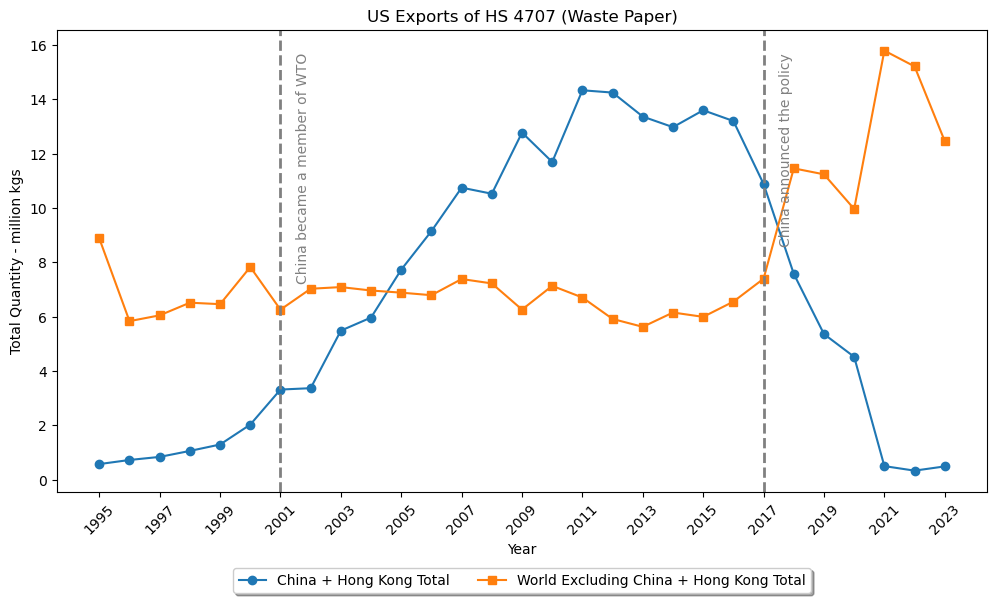

In [33]:
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(merged_paper_df['Time'], merged_paper_df['China_HK_Total']/1e6, label='China + Hong Kong Total', marker='o')
plt.plot(merged_paper_df['Time'], merged_paper_df['World_Excluding_China_HK_Total']/1e6, label='World Excluding China + Hong Kong Total', marker='s')

# Add vertical lines with annotations
plt.axvline(x=2001, color='grey', linestyle='--', linewidth=2)
plt.text(2001.5, plt.ylim()[1]*0.95, 'China became a member of WTO', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)
plt.axvline(x=2017, color='grey', linestyle='--', linewidth=2)
plt.text(2017.5, plt.ylim()[1]*0.95, 'China announced the policy', verticalalignment='top', horizontalalignment='left', color='grey', rotation=90)

# Adding plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Quantity - million kgs')
plt.title('US Exports of HS 4707 (Waste Paper)')

# Place the legend in the middle below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.grid(False)

# Customizing x-ticks to prevent overlapping
plt.xticks(merged_metal_df['Time'][::2])  # Show every second year to avoid clutter
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Saving the figure including the external legend
plt.savefig('export_hs4707_comparison_plot_ChinaHK_1995.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()